<a href="https://colab.research.google.com/github/mbayekebe/Coursera_Capstone/blob/master/Analysis_PP_Corr_CA_CCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis using Pairwise Plotting, Correlations, Correspondence Analysis (CA), and Canonical Correlations (CCA)

In [0]:
# imports
import pandas as pd


In [0]:
#read the datasets
tds = pd.read_csv('TorontoVenueCategoriesByBorough.csv')
nds = pd.read_csv('NewYorkVenueCategoriesByBorough.csv')

In [0]:
tds.head()

,VenueCategories,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Queen's Park,Scarborough,West Toronto,York
0,Accessories Store,3,1,0,1,1,0,3,0,3,1,0
1,Acupuncturist,0,0,0,0,0,0,1,0,0,0,0
2,Adult Boutique,0,1,0,0,1,0,0,0,0,0,0
3,Advertising Agency,1,1,0,0,0,0,0,0,1,1,0
4,Afghan Restaurant,1,0,0,0,0,0,0,0,0,0,1


In [0]:
tds.shape

(502, 12)

In [0]:
nds.head()

,VenueCategories,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Yoga Studio,0,34,37,8,0
1,Accessories Store,2,0,4,2,2
2,Adult Boutique,0,1,2,0,0
3,Afghan Restaurant,0,0,1,2,0
4,African Restaurant,2,0,3,0,0


In [0]:
nds.shape

(430, 6)

In [0]:
def striplist(l):
    return([x.strip() for x in l])


In [0]:
tvencat = []
nvencat = []
tvencat = tds['VenueCategories']
nvencat = nds['VenueCategories']
# nvencat = map(str.strip, nvencat)   # strip venue categories that have leading blank
nvencat = striplist(nvencat)
nds['VenueCategories'] = nvencat
# nvencat

In [0]:
nds.head()

,VenueCategories,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Yoga Studio,0,34,37,8,0
1,Accessories Store,2,0,4,2,2
2,Adult Boutique,0,1,2,0,0
3,Afghan Restaurant,0,0,1,2,0
4,African Restaurant,2,0,3,0,0


In [0]:
nds.shape

(430, 6)

In [0]:
tnvencat = []
tnvencat = list(set(tvencat).intersection(nvencat))

In [0]:
# tnvencat

In [0]:
len(tnvencat)

354

In [0]:
tds = tds[tds['VenueCategories'].isin(tnvencat)]
nds = nds[nds['VenueCategories'].isin(tnvencat)]

In [0]:
nds.shape

(354, 6)

In [0]:
tds.shape

(354, 12)

In [0]:
tds.head()


,VenueCategories,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Queen's Park,Scarborough,West Toronto,York
0,Accessories Store,3,1,0,1,1,0,3,0,3,1,0
2,Adult Boutique,0,1,0,0,1,0,0,0,0,0,0
4,Afghan Restaurant,1,0,0,0,0,0,0,0,0,0,1
5,African Restaurant,0,0,0,1,3,0,3,0,3,0,0
11,Airport Terminal,0,4,0,0,0,0,0,0,0,0,0


In [0]:
nds.head()

,VenueCategories,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Yoga Studio,0,34,37,8,0
1,Accessories Store,2,0,4,2,2
2,Adult Boutique,0,1,2,0,0
3,Afghan Restaurant,0,0,1,2,0
4,African Restaurant,2,0,3,0,0


In [0]:
# join the two dataframes on VenueCategories
tnds = pd.merge(tds, nds, on='VenueCategories', how='inner')


In [0]:
tnds.head()

,VenueCategories,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Queen's Park,Scarborough,West Toronto,York,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Accessories Store,3,1,0,1,1,0,3,0,3,1,0,2,0,4,2,2
1,Adult Boutique,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0,0
2,Afghan Restaurant,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0
3,African Restaurant,0,0,0,1,3,0,3,0,3,0,0,2,0,3,0,0
4,Airport Terminal,0,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [0]:
tnds.shape

(354, 17)

In [0]:
tnds.to_csv('NewYorkTorontoVenueCategoriesByBorough_com.csv')

In [0]:
tds.to_csv('TorontoVenueCategoriesByBorough_com.csv')
nds.to_csv('NewYorkVenueCategoriesByBorough_com.csv')

## Pairwise Plotting and Correlation Analysis

Within Toronto -- How do the neighborhoods compare by borough?

In [0]:
# imports
import seaborn as sns



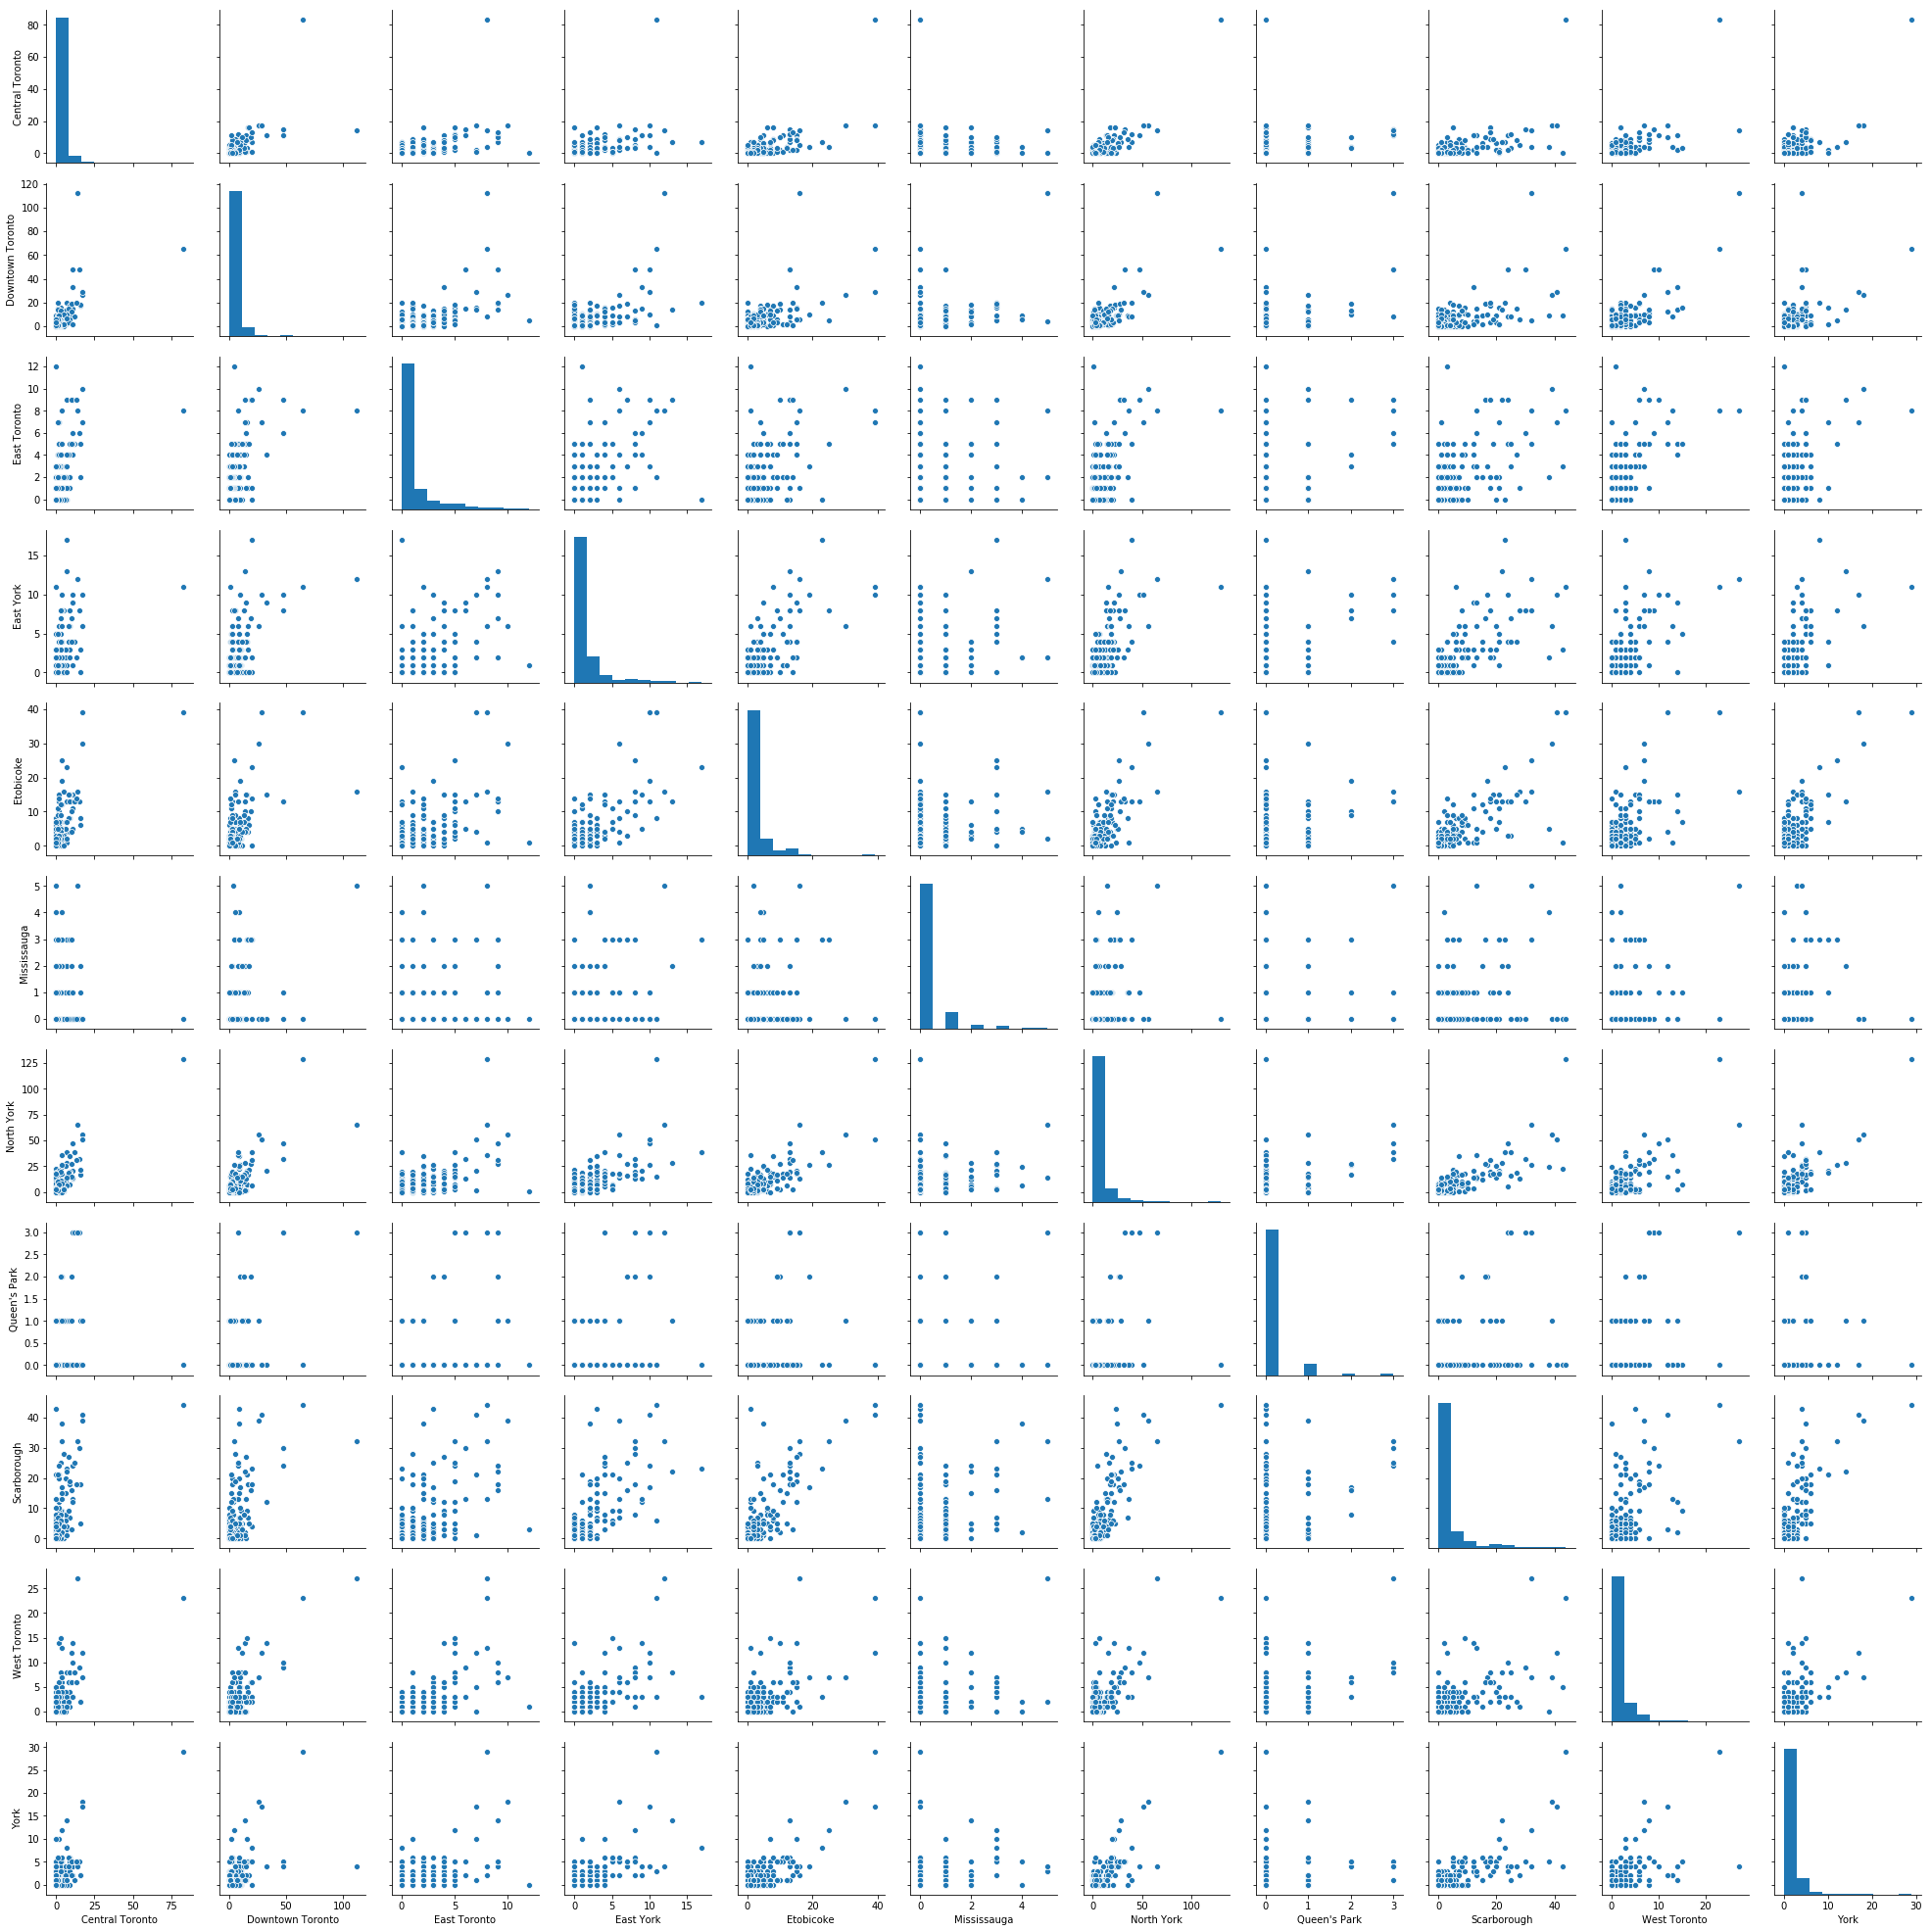

In [0]:
# plotting Toronto borough variables
sns.pairplot(tds,height=2.5)

                  Central Toronto  Downtown Toronto  East Toronto  East York  \
Central Toronto          1.000000          0.646956      0.520869   0.520343   
Downtown Toronto         0.646956          1.000000      0.603255   0.621222   
East Toronto             0.520869          0.603255      1.000000   0.589989   
East York                0.520343          0.621222      0.589989   1.000000   
Etobicoke                0.686715          0.608920      0.605017   0.747016   
Mississauga              0.149845          0.414821      0.329346   0.398502   
North York               0.847785          0.757244      0.627300   0.727114   
Queen's Park             0.245318          0.521314      0.372590   0.414068   
Scarborough              0.592369          0.611005      0.615291   0.736413   
West Toronto             0.638951          0.780251      0.663588   0.657240   
York                     0.725287          0.532110      0.570752   0.667314   

                  Etobicoke  Mississaug

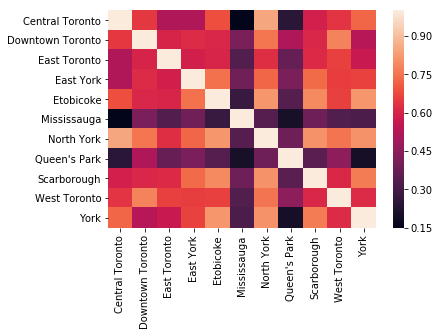

In [0]:
# looking at Toronto borough correlations
corr = tds.corr()
print(corr)
sns.heatmap(corr)

Within New York -- How do the neighborhoods compare by borough?

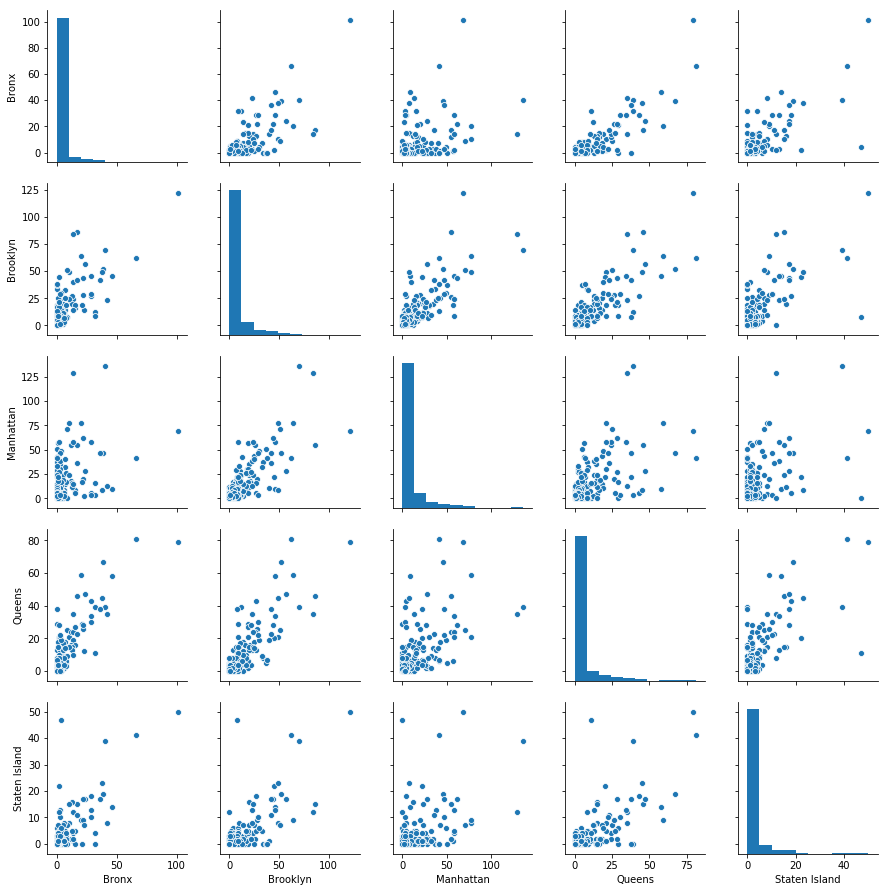

In [0]:
# plotting New York borough variables
sns.pairplot(nds,height=2.5)

                  Bronx  Brooklyn  Manhattan    Queens  Staten Island
Bronx          1.000000  0.765985   0.476835  0.858953       0.763439
Brooklyn       0.765985  1.000000   0.812482  0.850335       0.734550
Manhattan      0.476835  0.812482   1.000000  0.628317       0.523215
Queens         0.858953  0.850335   0.628317  1.000000       0.740938
Staten Island  0.763439  0.734550   0.523215  0.740938       1.000000


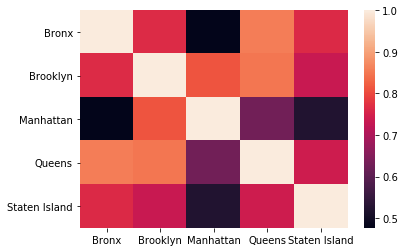

In [0]:
# looking at New York borough correlations
corr = nds.corr()
print(corr)
sns.heatmap(corr)

Looking at the correlations both Toronto and New York together.

                  Central Toronto  Downtown Toronto  East Toronto  East York  \
Central Toronto          1.000000          0.646956      0.520869   0.520343   
Downtown Toronto         0.646956          1.000000      0.603255   0.621222   
East Toronto             0.520869          0.603255      1.000000   0.589989   
East York                0.520343          0.621222      0.589989   1.000000   
Etobicoke                0.686715          0.608920      0.605017   0.747016   
Mississauga              0.149845          0.414821      0.329346   0.398502   
North York               0.847785          0.757244      0.627300   0.727114   
Queen's Park             0.245318          0.521314      0.372590   0.414068   
Scarborough              0.592369          0.611005      0.615291   0.736413   
West Toronto             0.638951          0.780251      0.663588   0.657240   
York                     0.725287          0.532110      0.570752   0.667314   
Bronx                    0.102121       

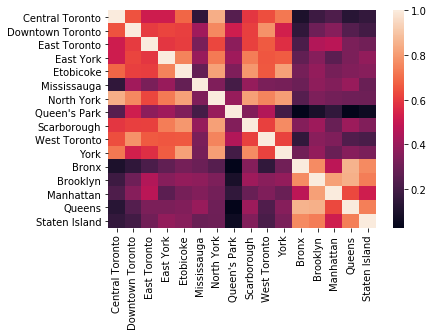

In [0]:
# looking at New York and Toronto borough correlations
corr = tnds.corr()
print(corr)
sns.heatmap(corr)

# Correspondence and Factor Analysis

In [0]:
# Installing required packages
# Installing the packages
!pip install prince  # doctest: +SKIP

Using correspondence analysis when you want to analyse a contingency table. In other words you want to analyse the dependencies between two categorical variables. The following example shows the number of occurrences between different hair and eye colors.

In [0]:
import numpy as np
import pandas as pd
import prince

In [0]:
matX = pd.read_csv('NewYorkTorontoVenueCategoriesByBorough_com.csv', index_col=0)
varNames = ['Central Toronto', 'Downtown Toronto', 'East Toronto','East York','Etobicoke','Mississauga','North York','Queen\'s' 'Park','Scarborough','West Toronto','York','Bronx','Brooklyn','Manhattan','Queens','Staten Island']

In [0]:
matX.head()

,VenueCategories,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Queen's Park,Scarborough,West Toronto,York,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Accessories Store,3,1,0,1,1,0,3,0,3,1,0,2,0,4,2,2
1,Adult Boutique,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0,0
2,Afghan Restaurant,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0
3,African Restaurant,0,0,0,1,3,0,3,0,3,0,0,2,0,3,0,0
4,Airport Terminal,0,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [0]:
# Reading the data
features = ['Central Toronto', 'Downtown Toronto', 'East Toronto','East York','Etobicoke','Mississauga','North York',"Queen's Park",'Scarborough','West Toronto','York','Bronx','Brooklyn','Manhattan','Queens','Staten Island']
# Separating out the features
X = matX.loc[:, features].values
# Separating out the target
y = matX.loc[:,['VenueCategories']].values

In [0]:
X
# X.head()

array([[ 3,  1,  0, ...,  4,  2,  2],
       [ 0,  1,  0, ...,  2,  0,  0],
       [ 1,  0,  0, ...,  1,  2,  0],
       ...,
       [ 0,  1,  1, ...,  3,  0,  3],
       [ 7,  7,  4, ..., 22,  4,  1],
       [ 0,  3,  3, ..., 37,  8,  0]])

In [0]:
len(y)

354

In [0]:
features

['Central Toronto',
 'Downtown Toronto',
 'East Toronto',
 'East York',
 'Etobicoke',
 'Mississauga',
 'North York',
 "Queen's Park",
 'Scarborough',
 'West Toronto',
 'York',
 'Bronx',
 'Brooklyn',
 'Manhattan',
 'Queens',
 'Staten Island']

In [0]:
# fitting the CA
import prince
ca = prince.CA( n_components=2, n_iter=3,copy=True,check_input=True,engine='auto', random_state=42)

ca = ca.fit(X)

In [0]:
ca.column_coordinates(X)

,0,1
0,0.773062,-0.093134
1,0.486596,-0.313578
2,0.313351,-0.209120
3,0.581735,0.206489
4,0.663062,0.149043
5,0.076118,-0.170532
6,0.649303,0.118248
7,0.984043,-0.375442
8,0.638788,0.302686
9,0.516369,-0.220797


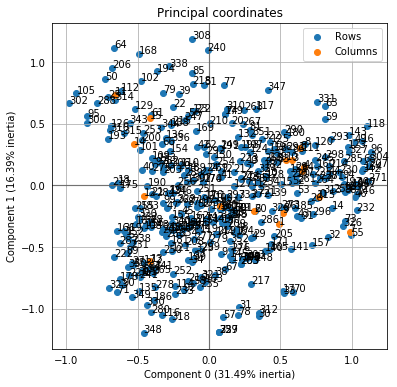

In [0]:
# plot both sets of principal coordinates with the plot_coordinates method.
ax = ca.plot_coordinates(X=X,ax=None,figsize=(6, 6),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
ax.get_figure().savefig('cant_coordinates.png')

In [0]:
import pandas as pd
matX = pd.read_csv('GroupVenueCatByBoroughNT.csv', index_col=0)
matX.columns.str.strip()
varNames = ['Central Toronto', 'Downtown Toronto', 'East Toronto','East York','Etobicoke','Mississauga','North York',"Queen's Park",'Scarborough','West Toronto','York','Bronx','Brooklyn','Manhattan','Queens','Staten Island']

In [0]:
matX.head()

,VenueCategories,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Queen's Park,Scarborough,West Toronto,York,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Arts,66,694,79,13,42,2,50,45,19,137,7,326,1292,1764,630,374
1,CollegeUniversity,59,475,10,7,6,2,41,48,11,21,2,439,609,1480,384,305
2,Food,200,780,212,123,120,32,300,50,196,272,37,1869,2931,2045,2709,1344
3,Professional,227,777,181,132,141,43,417,50,277,255,65,2069,2954,2051,2916,1664
4,Nightlife,60,670,75,20,18,1,45,41,14,146,13,406,1314,1803,909,340


In [0]:
# Reading the data
features = ['Central Toronto', 'Downtown Toronto', 'East Toronto','East York','Etobicoke','Mississauga','North York',"Queen's Park",'Scarborough','West Toronto','York','Bronx','Brooklyn','Manhattan','Queens','Staten Island']
# Separating out the features
X = matX.loc[:, features].values
# Separating out the target
# y = matX.loc[:,['VenueCategories']].values
y = matX.iloc[:,0]

In [0]:
X


array([[  66,  694,   79,   13,   42,    2,   50,   45,   19,  137,    7,
         326, 1292, 1764,  630,  374],
       [  59,  475,   10,    7,    6,    2,   41,   48,   11,   21,    2,
         439,  609, 1480,  384,  305],
       [ 200,  780,  212,  123,  120,   32,  300,   50,  196,  272,   37,
        1869, 2931, 2045, 2709, 1344],
       [ 227,  777,  181,  132,  141,   43,  417,   50,  277,  255,   65,
        2069, 2954, 2051, 2916, 1664],
       [  60,  670,   75,   20,   18,    1,   45,   41,   14,  146,   13,
         406, 1314, 1803,  909,  340],
       [ 145,  737,  155,   48,   66,    7,  121,   45,   82,  157,   41,
         988, 1902, 1997, 1449,  774],
       [ 210,  776,  225,  141,  163,   27,  396,   50,  285,  271,   63,
        2051, 3008, 2026, 2926, 1597],
       [  57,  665,   71,   36,   23,   10,   70,   28,   43,   79,    8,
         960, 1598, 1731, 1297,  588],
       [ 145,  606,   25,   16,   16,    0,  105,   49,   35,   85,   19,
         853, 1563, 19

In [0]:
y

0                 Arts
1    CollegeUniversity
2                 Food
3         Professional
4            Nightlife
5              Outdoor
6         ShopServices
7      TravelTransport
8            Residence
Name: VenueCategories, dtype: object

In [0]:
# fitting the CA
import prince
ca = prince.CA( n_components=2, n_iter=3,copy=True,check_input=True,engine='auto', random_state=42)
ca = ca.fit(X)

In [0]:
ca.column_coordinates(X)

,0,1
0,-0.038910,-0.099862
1,0.319230,0.043261
2,-0.187663,0.250082
3,-0.449428,0.036920
4,-0.383842,0.155290
5,-0.603649,-0.029696
6,-0.385946,-0.061855
7,0.396001,-0.083538
8,-0.547440,-0.014923
9,-0.053016,0.239826


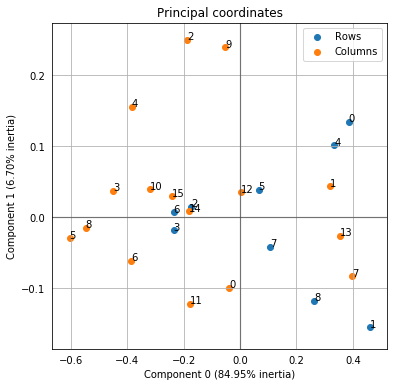

In [0]:
# plot both sets of principal coordinates with the plot_coordinates method.
ax = ca.plot_coordinates(X=X,ax=None,figsize=(6, 6),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
ax.get_figure().savefig('cantg_coordinates.png')

# Canonical Correlations -- CCA

Compare cross decomposition methods
Simple usage of various cross decomposition algorithms:

PLSCanonical
PLSRegression, with multivariate response, a.k.a. PLS2
PLSRegression, with univariate response, a.k.a. PLS1
CCA
Given 2 multivariate covarying two-dimensional datasets, X, and Y, PLS extracts the 'directions of covariance', i.e. the components of each datasets that explain the most shared variance between both datasets. This is apparent on the scatterplot matrix display: components 1 in dataset X and dataset Y are maximally correlated (points lie around the first diagonal). This is also true for components 2 in both dataset, however, the correlation across datasets for different components is weak: the point cloud is very spherical.

Corr(X)
[[1.   0.65 0.52 0.52 0.69 0.15 0.85 0.25 0.59 0.64 0.73]
 [0.65 1.   0.6  0.62 0.61 0.41 0.76 0.52 0.61 0.78 0.53]
 [0.52 0.6  1.   0.59 0.61 0.33 0.63 0.37 0.62 0.66 0.57]
 [0.52 0.62 0.59 1.   0.75 0.4  0.73 0.41 0.74 0.66 0.67]
 [0.69 0.61 0.61 0.75 1.   0.28 0.82 0.34 0.79 0.66 0.82]
 [0.15 0.41 0.33 0.4  0.28 1.   0.34 0.21 0.39 0.33 0.32]
 [0.85 0.76 0.63 0.73 0.82 0.34 1.   0.39 0.81 0.75 0.81]
 [0.25 0.52 0.37 0.41 0.34 0.21 0.39 1.   0.35 0.45 0.2 ]
 [0.59 0.61 0.62 0.74 0.79 0.39 0.81 0.35 1.   0.61 0.77]
 [0.64 0.78 0.66 0.66 0.66 0.33 0.75 0.45 0.61 1.   0.62]
 [0.73 0.53 0.57 0.67 0.82 0.32 0.81 0.2  0.77 0.62 1.  ]]
Corr(Y)
[[1.   0.77 0.48 0.86 0.76]
 [0.77 1.   0.81 0.85 0.73]
 [0.48 0.81 1.   0.63 0.52]
 [0.86 0.85 0.63 1.   0.74]
 [0.76 0.73 0.52 0.74 1.  ]]


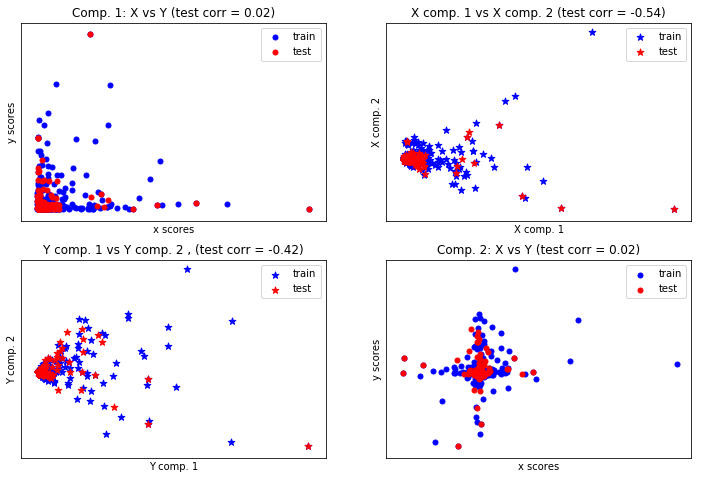

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

# #############################################################################
# Dataset based latent variables model

X = pd.read_csv('TorontoVenueCategoriesByBorough_com_cca.csv')
Y = pd.read_csv('NewYorkVenueCategoriesByBorough_com_cca.csv')

X_train = X.head(284) # 70% 0f 354 records
Y_train = Y.head(284)
X_test = X.tail(106)   # 30% of 354 records
Y_test = Y.tail(106)

#X = pd.read_csv('torontods.csv')
#Y = pd.read_csv('newyorkds.csv')

#X_train = X.head(70) # 70% 0f 103 records
#Y_train = Y.head(70)
#X_test = X.tail(32)   # 30% of 103 records
#Y_test = Y.tail(32)


print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

# #############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

# #############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)